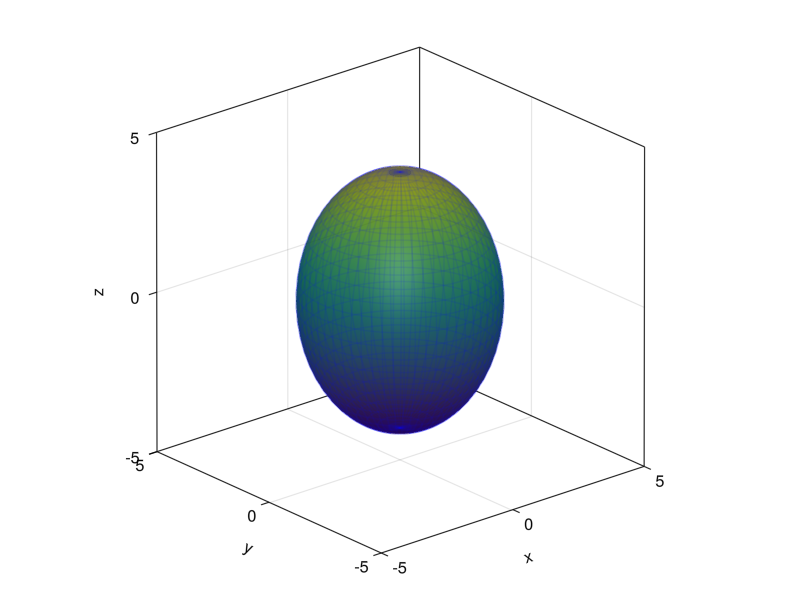

In [36]:
using GLMakie
a = 3
b= 3
c = 4

f(θ,ϕ) = [a*cos(ϕ)*sin(θ), b*sin(ϕ)*sin(θ), c*cos(θ)]
points = [f(θ,ϕ) for θ in range(0,π,30), ϕ in range(0,2π,60)]
x,y,z = eachslice(stack(points), dims=1)
fig = Figure()
ax = Axis3(fig[1,1],limits=(-5,5,-5,5,-5,5), aspect = :data)
wireframe!(x,y,z, transparency=true,color = (:blue,0.1),aspectratio=1)
surface!(x, y, z, transparency=true)
save("ellipsoid.png",fig)
fig
basis1(θ,ϕ) = [a*cos(ϕ)*cos(θ), b*sin(ϕ)*cos(θ), -c*sin(θ)]
basis2(θ,ϕ)= [-a*sin(ϕ)*sin(θ), b*cos(ϕ)*sin(θ), 0]
fig 
t2 = 1.7*π
t1 = 0.2*π
#arrows!(ax, [0],[0],[0],[f(t1,t2)[1]],[f(t1,t2)[2]],[f(t1,t2)[3]],color =:black,linewidth=0.1)
#arrows!(ax, [f(t1,t2)[1]],[f(t1,t2)[2]],[f(t1,t2)[3]], [basis1(t1,t2)[1]],[basis1(t1,t2)[3]],[basis1(t1,t2)[3]], color = :blue,linewidth=0.1)
#arrows!(ax, [f(t1,t2)[1]],[f(t1,t2)[2]],[f(t1,t2)[3]], [basis2(t1,t2)[1]],[basis2(t1,t2)[3]],[basis2(t1,t2)[3]], color = :red,linewidth=0.1)
fig
#save("tangent.png",fig)
#fig

In [37]:
using OrdinaryDiffEq
function geodesic!(ddx,dx,x,p,t)
    a,c = p
    ddx[1] = (-a^2*cos(x[1]*sin(x[2]))+c^2*sin(x[1])*cos(x[1])) *dx[1]^2 +a^2*sin(x[1])^2*dx[2]^2
    ddx[2]=-2*cot(x[1])*dx[1]*dx[2]
end
dx0 = [0.,0.4]
x0=[π*0.3,0.8*π]
tspan=(0,7)
prob = SecondOrderODEProblem(geodesic!,dx0,x0,tspan,[a,b])
sol = solve(prob,RK4(),dt=0.001)

┌ Warning: dt(8.881784197001252e-16) <= dtmin(8.881784197001252e-16) at t=5.255572197465717, and step error estimate = 0.6507444272371871. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\batti\.julia\packages\SciMLBase\s9wrq\src\integrator_interface.jl:599


retcode: DtLessThanMin
Interpolation: 3rd order Hermite
t: 192-element Vector{Float64}:
 0.0
 0.001
 0.008285788105902477
 0.025876513073534762
 0.05593780149933428
 0.10338267290637528
 0.15136171317225117
 0.2123687976183816
 0.27979154251941707
 0.35759423795908674
 ⋮
 5.2555721974657
 5.255572197465703
 5.255572197465707
 5.2555721974657095
 5.255572197465711
 5.255572197465713
 5.255572197465715
 5.255572197465716
 5.255572197465717
u: 192-element Vector{RecursiveArrayTools.ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}}}:
 ([0.0, 0.4], [0.9424777960769379, 2.5132741228718345])
 ([0.0009424910214099661, 0.39999972609612927], [0.9424782673227523, 2.5136741227805333])
 ([0.007808598799125997, 0.39998119721231445], [0.9425101477090141, 2.516588386179973])
 ([0.02436725090680285, 0.39981677759717404], [0.9427932028712557, 2.523623147075839])
 ([0.05250625914500809, 0.3991469189330741], [0.9439493448729267, 2.5356333072001878])
 ([0.09608046628821053, 0.397118574203834

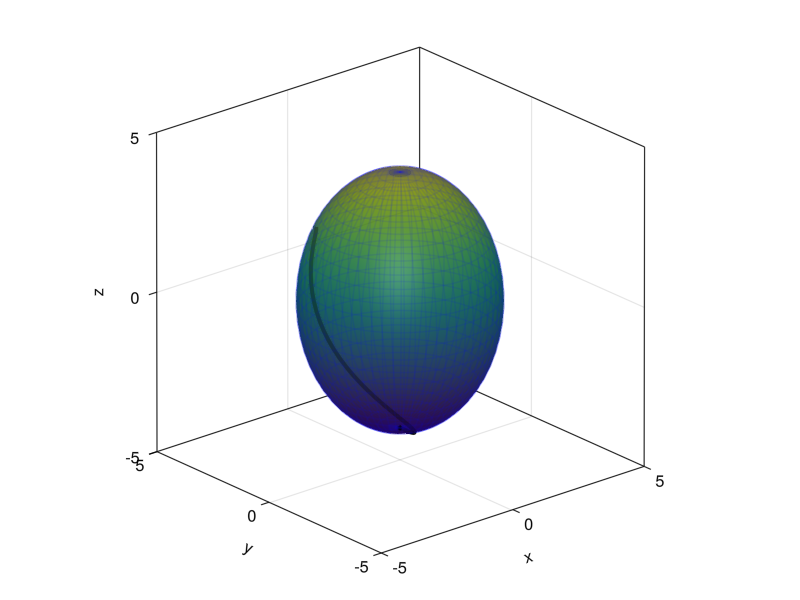

In [38]:
θ = sol[3,:]
ϕ = sol[4,:]
f.(θ,ϕ)
points = hcat(f.(θ,ϕ)...)
lines!(ax,points[1,:],points[2,:],points[3,:],color = :black,linewidth=4,transparency=true)
fig
save("geodesic.png",fig)
fig